# CS105 Team 2 Final Project

## Proposal

We want to study the University UCI database. We want to answer questions such as if university expenses predicts quality of life, if sat-score predicts percent-admittance, if the data can be clustered, etc.

## Data Cleaning

The University dataset is quite old and takes some effort to turn it into a usable pandas dataframe. First, we've removed all commented-out features. These are missing features that will be replaced in the future. Second, we've removed all duplicate entries; some universities show up more than once with little difference in features, so we've removed those duplicate instances. Third, we've transformed the data into a comma-separated list. Finally, we can read this data into a pandas dataframe:

In [1484]:
import pandas as pd

features = ['university-name', 'state', 'location', 'control', 'number-of-students', 'male-percentage',
            'student-percentage', 'sat-verbal', 'sat-math', 'expenses', 'percent-financial-aid',
            'number-of-applicants', 'percent-admittance', 'percent-enrolled', 'academics', 'social',
            'quality-of-life', 'academic-emphasis']
df = pd.read_csv('university.csv', 
                   names = features)

df.head(4)

,university-name,state,location,control,number-of-students,male-percentage,student-percentage,sat-verbal,sat-math,expenses,percent-financial-aid,number-of-applicants,percent-admittance,percent-enrolled,academics,social,quality-of-life,academic-emphasis
0,ABILENE-CHRISTIAN-UNIVERSITY,TEXAS,SUBURBAN,PRIVATE,5-,50:50,21:1,NaN,NaN,4-,70.0,4-,90.0,80.0,2.0,3.0,3.0,['LIBERAL-ARTS']
1,ADELPHI,NEWYORK,SUBURBAN,PRIVATE,5-10,30:70,15:1,500.0,475.0,7-10,60.0,4-7,70.0,40.0,2.0,2.0,2.0,"['BUSINESS-ADMINISTRATION', 'BIOLOGY']"
2,AMERICAN-UNIVERSITY-OF-BEIRUT,FOREIGN,URBAN,PRIVATE,5-10,60:40,4:1,NaN,NaN,4-,20.0,4-7,50.0,80.0,3.0,3.0,3.0,"['MEDICAL-SCHOOL', 'ENGINEERING', 'HUMANITIES']"
3,ARIZONA-STATE,ARIZONA,URBAN,STATE,20+,50:50,20:1,450.0,500.0,4-7,50.0,17+,80.0,60.0,3.0,4.0,5.0,"['BUSINESS-EDUCATION', 'ENGINEERING', 'ACCOUNT..."


There are still some issues with the data. We have some missing features, some numbers are represented as a range, and ratios should be floats. We'll convert all numerical data into floats. For features with ranges, we'll use the convention of taking the lower number within the range for all values.

In [1485]:
def convertRatio(x):
    if isinstance(x, float) or x == 'NaN':
        return x
    a, b = x.split(':')
    c = float(a)/(float(a) + float(b))
    return c

def getLower(x):
    if isinstance(x, float) or x == 'NaN':
        return x
    start_index = 0
    while not x[start_index].isnumeric():
        start_index += 1
    end_index = start_index
    while end_index < len(x) and x[end_index].isnumeric():
        end_index += 1
    return float(x[start_index:end_index]) * 1000.0

def convertPercentage(x):
    if isinstance(x, float) and x <= 1.0 or x == 'NaN':
        return x
    return float(x)/100

df['number-of-students'] = df['number-of-students'].apply(getLower)
df['male-percentage'] = df['male-percentage'].apply(convertRatio)
df['student-percentage'] = df['student-percentage'].apply(convertRatio)
df['sat-verbal'] = df['sat-verbal'].astype(float)
df['sat-math'] = df['sat-math'].astype(float)
df['expenses'] = df['expenses'].apply(getLower)
df['percent-financial-aid'] = df['percent-financial-aid'].apply(convertPercentage)
df['number-of-applicants'] = df['number-of-applicants'].apply(getLower)
df['percent-admittance'] = df['percent-admittance'].apply(convertPercentage)
df['percent-enrolled'] = df['percent-enrolled'].apply(convertPercentage)
df['academics'] = df['academics'].astype(float)
df['social'] = df['social'].astype(float)
df['quality-of-life'] = df['quality-of-life'].astype(float)

df.head(4)

,university-name,state,location,control,number-of-students,male-percentage,student-percentage,sat-verbal,sat-math,expenses,percent-financial-aid,number-of-applicants,percent-admittance,percent-enrolled,academics,social,quality-of-life,academic-emphasis
0,ABILENE-CHRISTIAN-UNIVERSITY,TEXAS,SUBURBAN,PRIVATE,5000.0,0.5,0.954545,NaN,NaN,4000.0,0.7,4000.0,0.9,0.8,2.0,3.0,3.0,['LIBERAL-ARTS']
1,ADELPHI,NEWYORK,SUBURBAN,PRIVATE,5000.0,0.3,0.937500,500.0,475.0,7000.0,0.6,4000.0,0.7,0.4,2.0,2.0,2.0,"['BUSINESS-ADMINISTRATION', 'BIOLOGY']"
2,AMERICAN-UNIVERSITY-OF-BEIRUT,FOREIGN,URBAN,PRIVATE,5000.0,0.6,0.800000,NaN,NaN,4000.0,0.2,4000.0,0.5,0.8,3.0,3.0,3.0,"['MEDICAL-SCHOOL', 'ENGINEERING', 'HUMANITIES']"
3,ARIZONA-STATE,ARIZONA,URBAN,STATE,20000.0,0.5,0.952381,450.0,500.0,4000.0,0.5,17000.0,0.8,0.6,3.0,4.0,5.0,"['BUSINESS-EDUCATION', 'ENGINEERING', 'ACCOUNT..."


We have some missing features in the 'student-percentage', 'sat-verbal', 'sat-math', 'percent-financial-aid', 'number-of-applicants', 'percent-admittance', 'percent-enrolled', 'academics', 'social', and 'quality-of-life' columns. For all of these, we'll take the median value across all rows and replace the missing value with it.

In [1486]:
for i in range(6, 17):
    df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].median())

df.head(4)

,university-name,state,location,control,number-of-students,male-percentage,student-percentage,sat-verbal,sat-math,expenses,percent-financial-aid,number-of-applicants,percent-admittance,percent-enrolled,academics,social,quality-of-life,academic-emphasis
0,ABILENE-CHRISTIAN-UNIVERSITY,TEXAS,SUBURBAN,PRIVATE,5000.0,0.5,0.954545,520.0,550.0,4000.0,0.7,4000.0,0.9,0.8,2.0,3.0,3.0,['LIBERAL-ARTS']
1,ADELPHI,NEWYORK,SUBURBAN,PRIVATE,5000.0,0.3,0.937500,500.0,475.0,7000.0,0.6,4000.0,0.7,0.4,2.0,2.0,2.0,"['BUSINESS-ADMINISTRATION', 'BIOLOGY']"
2,AMERICAN-UNIVERSITY-OF-BEIRUT,FOREIGN,URBAN,PRIVATE,5000.0,0.6,0.800000,520.0,550.0,4000.0,0.2,4000.0,0.5,0.8,3.0,3.0,3.0,"['MEDICAL-SCHOOL', 'ENGINEERING', 'HUMANITIES']"
3,ARIZONA-STATE,ARIZONA,URBAN,STATE,20000.0,0.5,0.952381,450.0,500.0,4000.0,0.5,17000.0,0.8,0.6,3.0,4.0,5.0,"['BUSINESS-EDUCATION', 'ENGINEERING', 'ACCOUNT..."


Finally, the data has been cleaned and we are ready to use it for our analysis.

## Exploratory Data Analysis

We'll start out the EDA by first comparing the 'quality-of-life' feature to some other features to see if there are any big predictors for a better university experience.

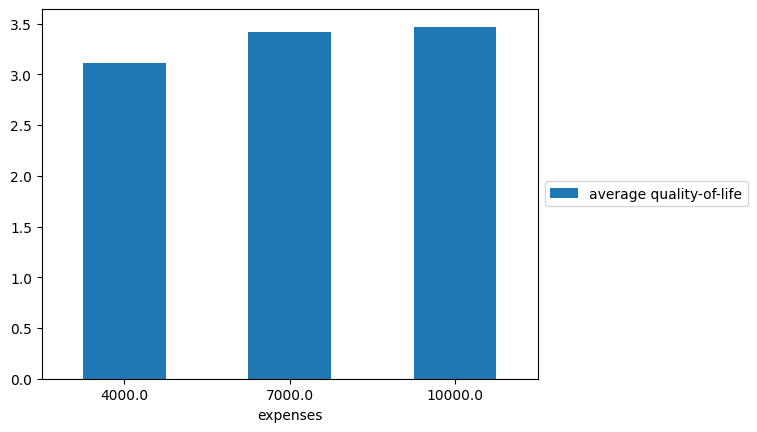

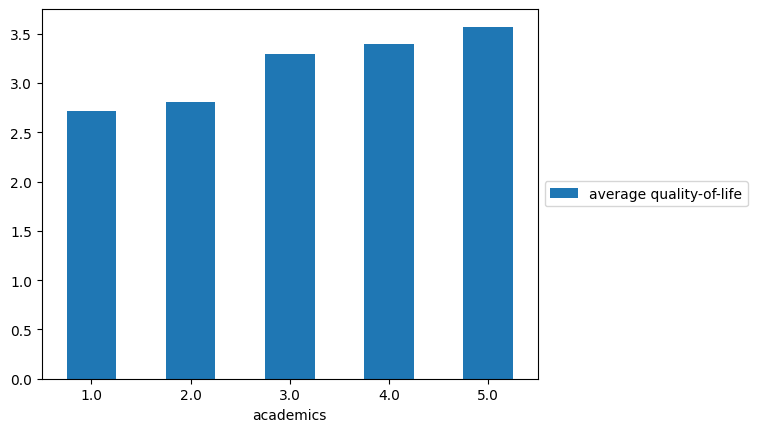

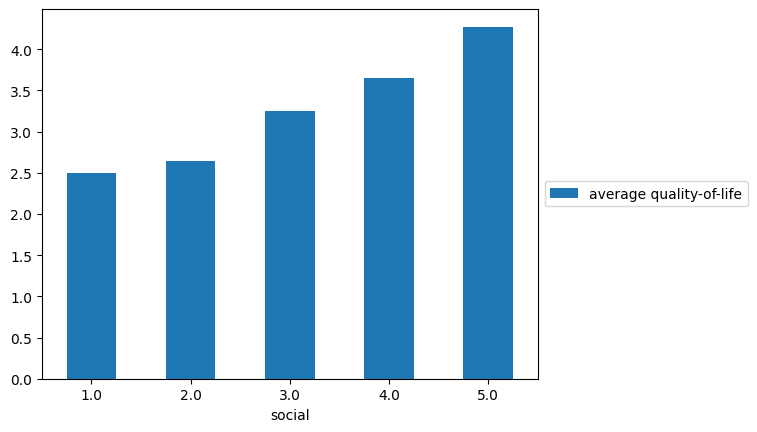

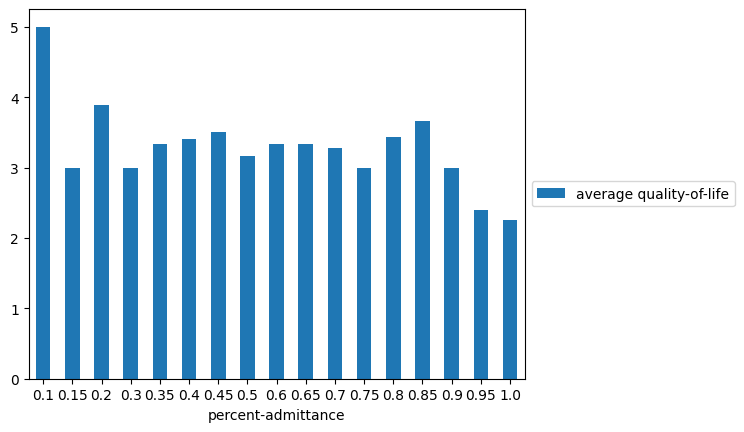

In [1487]:
import matplotlib.pyplot as plt

def weightedAverage(x, averaged_feature):
    avgs = []
    for index, row in x.iterrows():
        avg = 0
        for i in range(0, len(row.tolist())):
            avg += (x.columns[i]) * row.tolist()[i]
        avg /= sum(row.tolist())
        avgs.append(avg)
    x = x.drop(x.columns[range(0, len(x.columns))], axis=1)
    x['average ' + averaged_feature] = avgs
    return x

shrunk_df = pd.crosstab(df['expenses'], df['quality-of-life'])
shrunk_df = weightedAverage(shrunk_df, 'quality-of-life')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['academics'], df['quality-of-life'])
shrunk_df = weightedAverage(shrunk_df, 'quality-of-life')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['social'], df['quality-of-life'])
shrunk_df = weightedAverage(shrunk_df, 'quality-of-life')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['percent-admittance'], df['quality-of-life'])
shrunk_df = weightedAverage(shrunk_df, 'quality-of-life')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

We can roughly gather that quality of life is positively correlated with expenses, academics quality, and social quality. We can also see that as percent admittance goes up, average quality of life seems to drop, but much more unpredictably compared to the other graphs.  

For this next section of EDA, we'll look at how sat scores correlate with other variables. We'll combine 'sat-math' and 'sat-verbal' into one variable 'sat-combined'.

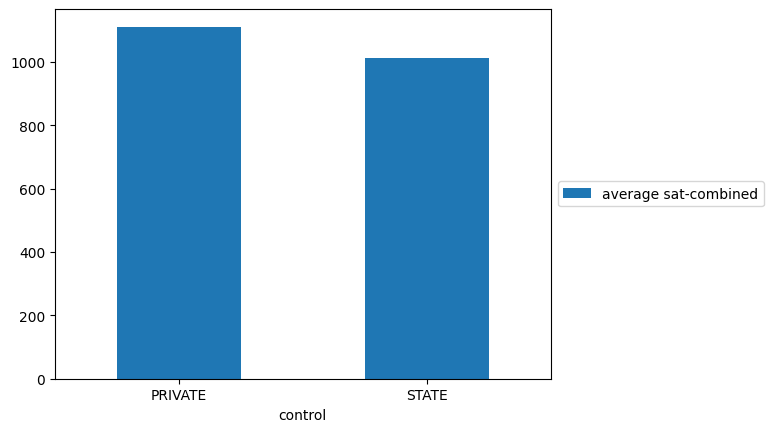

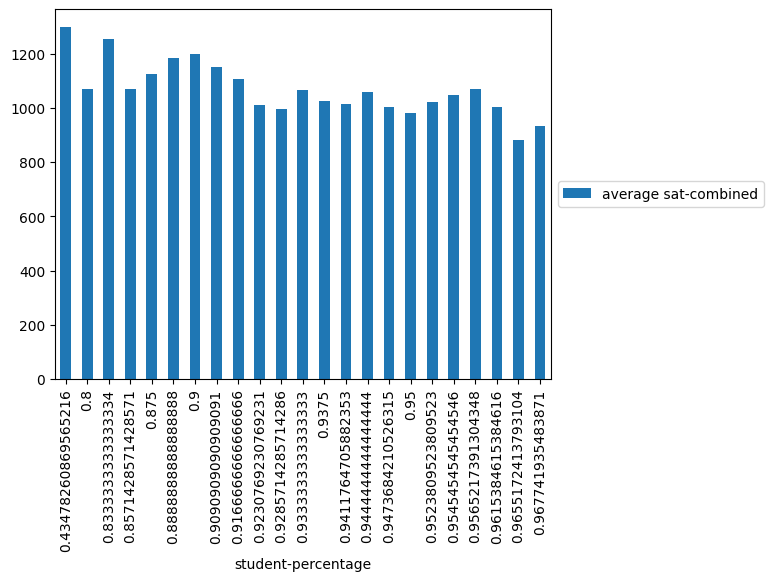

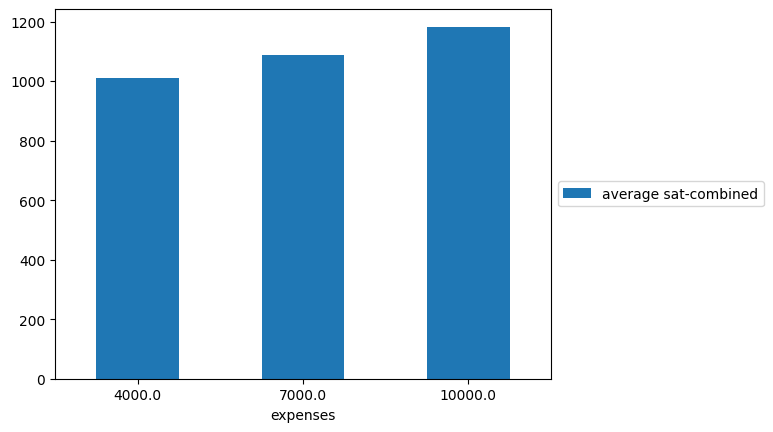

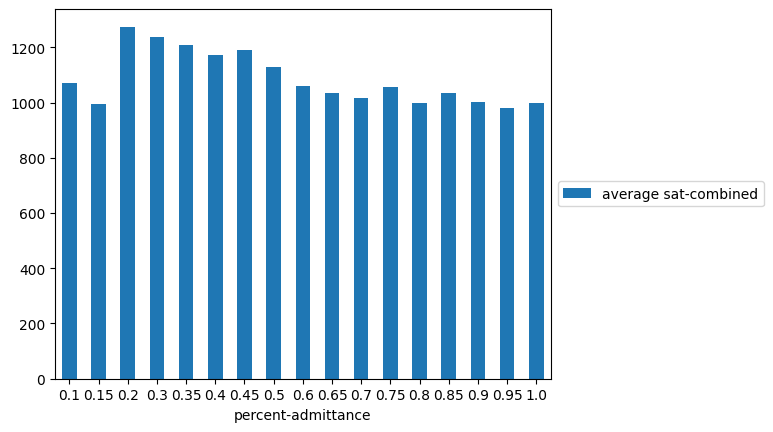

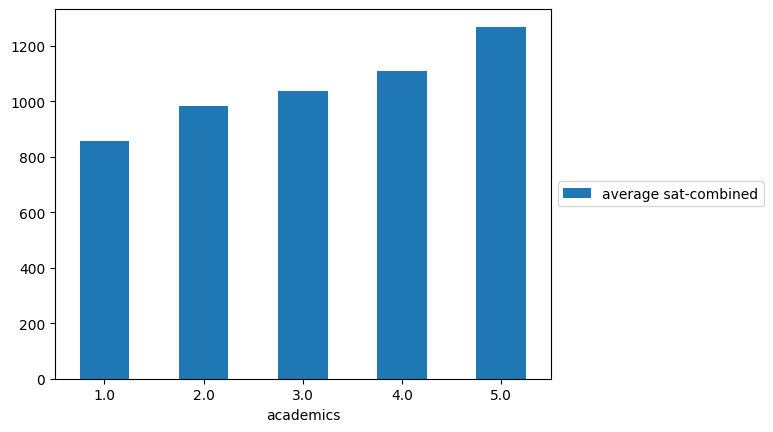

In [1488]:
math = df['sat-math'].values.tolist()
verbal = df['sat-verbal'].values.tolist()
combined = []
for i in range(0, len(math)):
    combined.append(math[i] + verbal[i])
df['sat-combined'] = combined

shrunk_df = pd.crosstab(df['control'], df['sat-combined'])
shrunk_df = weightedAverage(shrunk_df, 'sat-combined')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['student-percentage'], df['sat-combined'])
shrunk_df = weightedAverage(shrunk_df, 'sat-combined')
shrunk_df.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['expenses'], df['sat-combined'])
shrunk_df = weightedAverage(shrunk_df, 'sat-combined')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['percent-admittance'], df['sat-combined'])
shrunk_df = weightedAverage(shrunk_df, 'sat-combined')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['academics'], df['sat-combined'])
shrunk_df = weightedAverage(shrunk_df, 'sat-combined')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

From these graphs, it seems higher SAT scores are positively correlated with higher academic quality and expenses, and negatively correlated with percent-admittance and student-percentage (i.e. how many faculty there are compared to students). Interestingly, it seems private universities take in students with higher SAT scores on average when compared to state schools.

For the last part of EDA, we'll perform some dimensionality reduction to see how our data looks in a low-dimensionality space. We'll use both Principal Component Analysis and TSNE.

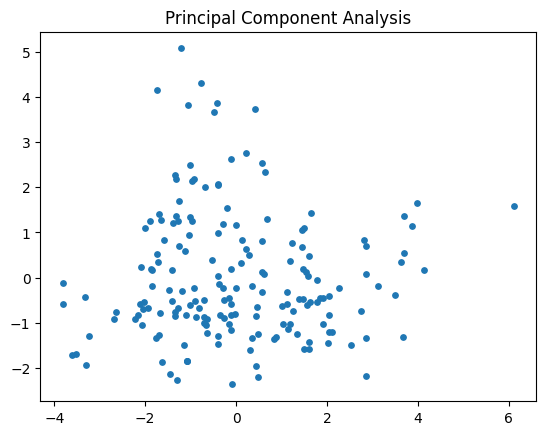

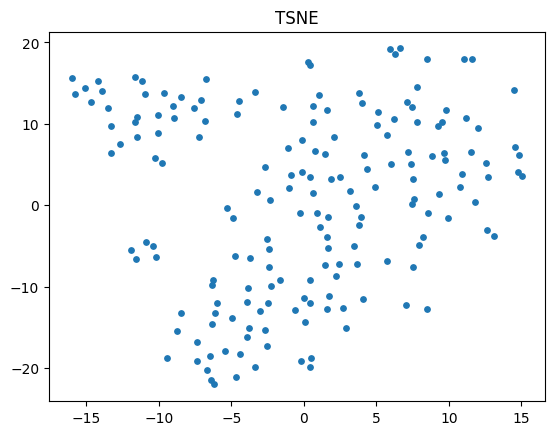

In [1489]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# normalize data
shrunk_df = df.drop(
    columns=['university-name', 'state', 'location', 'control', 'academic-emphasis', 'sat-verbal', 'sat-math'])
norm = shrunk_df.values
norm = StandardScaler().fit_transform(norm)

# create new dataframe with PCA data
new_frame = pd.DataFrame(data = PCA(n_components=2).fit_transform(norm), columns = ['X1', 'X2'])

# plot new dataframe
scatter_x_pca1 = new_frame.loc[:, 'X1'].to_numpy()
scatter_y_pca1 = new_frame.loc[:, 'X2'].to_numpy()
plt.scatter(scatter_x_pca1, scatter_y_pca1, s = 15)
plt.title('Principal Component Analysis')
plt.show()

# run TSNE on the normalized features
tsne = TSNE(n_components=2, perplexity=17, n_iter=1000).fit_transform(norm)

# plot TSNE columns
scatter_x = tsne[:, 0]
scatter_y = tsne[:, 1]
plt.scatter(scatter_x, scatter_y, s = 15)
out = plt.title('TSNE')
plt.show()

Judging from the above dimensionality reductions, it seems like we might be able to cluster our data at least somewhat efficiently. We'll explore this in the next section.

## Main Analysis Part 1: Clustering

For the first part of our main analysis, we're going to study how our data can be clustered. We'll be using K-means clustering combined with the elbow method to find a good value for K.

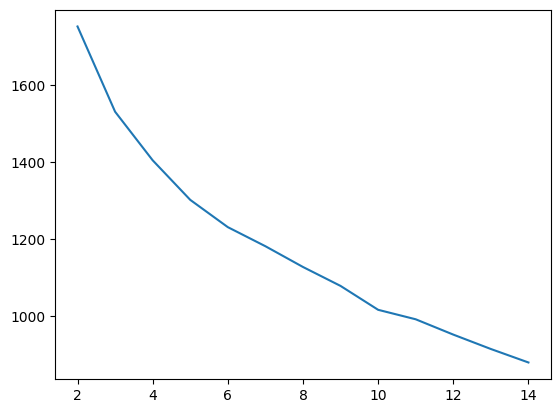

In [1490]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

SSE = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(norm)
    SSE.append(kmeans.inertia_)

plt.plot(range(2, 15), SSE)
plt.show()

Judging from the above graph, it seems like our elbow point is at K=6, which is the value we'll use for our analysis. Let's see what the clusters look like with PCA:

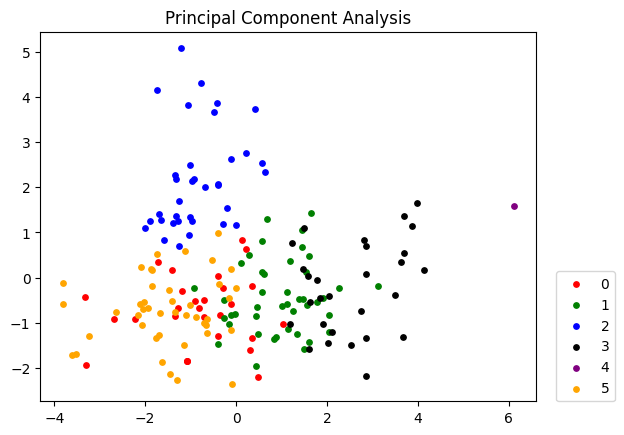

In [1491]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(norm)
labels = kmeans.labels_

cdict = {0: 'red', 1: 'green', 2: 'blue', 3:'black', 4:'purple', 5:'orange'}
for c in np.unique(labels):
    hit = np.where(labels == c)
    plt.scatter(scatter_x_pca1[hit], scatter_y_pca1[hit], c = cdict[c], label = c, s = 15)
    plt.title('Principal Component Analysis')
    
plt.legend(loc=(1.04, 0))
plt.show()

Although a bit hard to visualize in two dimensions, it seems like each cluster represents a different section of the overall 'blob', with one cluster containing only a single outlier. This outlier happens to be PENN-STATE, which will be ignored for the rest of the clustering analysis.

In [1492]:
if 'label' not in df:
    df['label'] = labels
    clustered_df = df.drop(df.loc[df['university-name'] == 'PENN-STATE'].index, inplace=True)

For this next part, we'll compare different numerical features to see which clusters stand out:

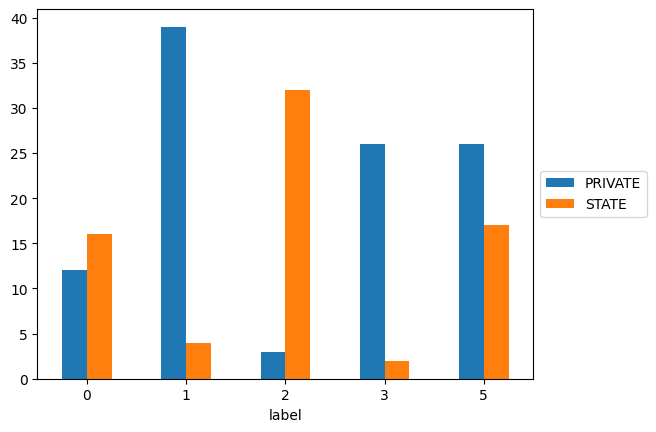

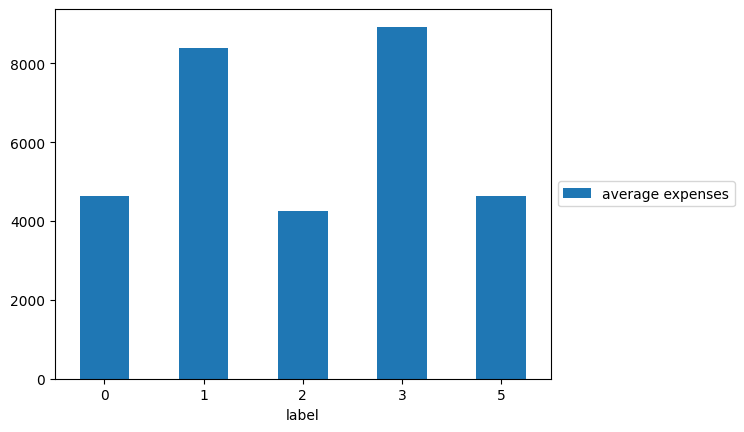

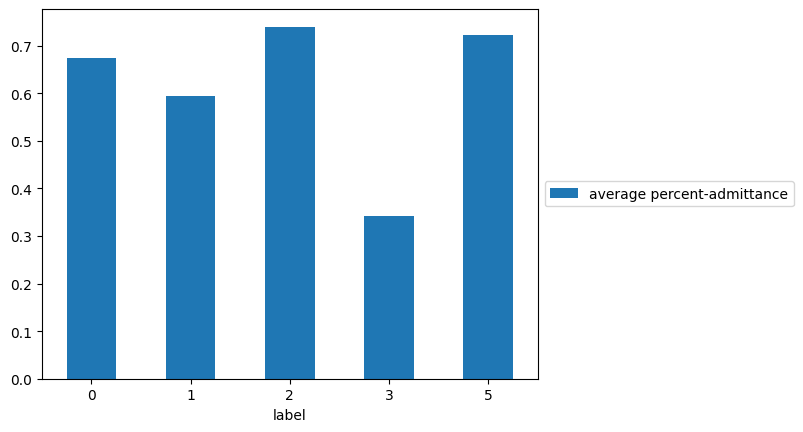

In [1493]:
shrunk_df = pd.crosstab(df['label'], df['control'])
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['expenses'])
shrunk_df = weightedAverage(shrunk_df, 'expenses')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['percent-admittance'])
shrunk_df = weightedAverage(shrunk_df, 'percent-admittance')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

From the above charts, we can get a good idea that one cluster represents private, prestigious universities with high expenses, such as Harvard. We can also gather that another cluster also represents high expense private universities, but with less prestige, such as University of the Pacific.

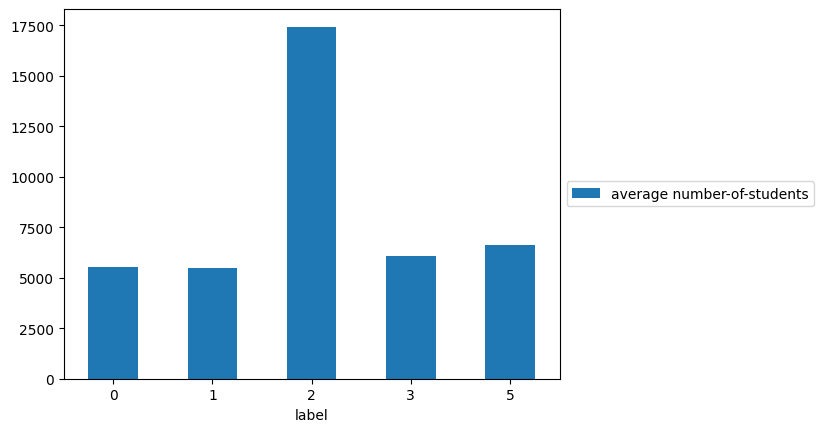

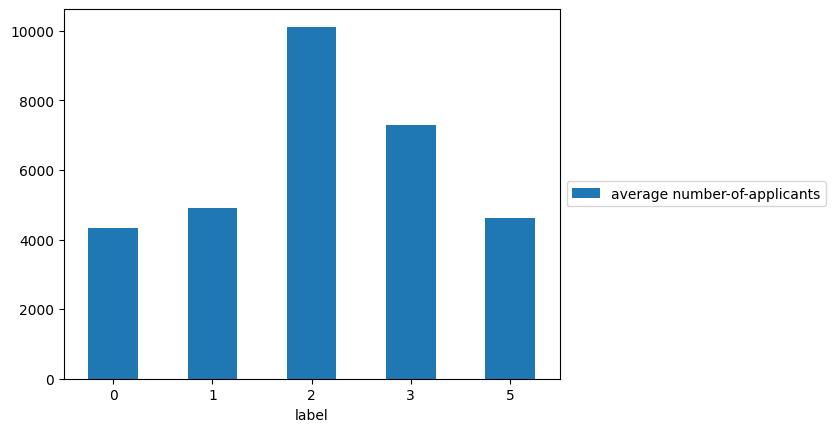

In [1494]:
shrunk_df = pd.crosstab(df['label'], df['number-of-students'])
shrunk_df = weightedAverage(shrunk_df, 'number-of-students')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['number-of-applicants'])
shrunk_df = weightedAverage(shrunk_df, 'number-of-applicants')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

We can gather from the above graphs that one cluster represents large state universities with high acceptance rates, such as University of Colorado.

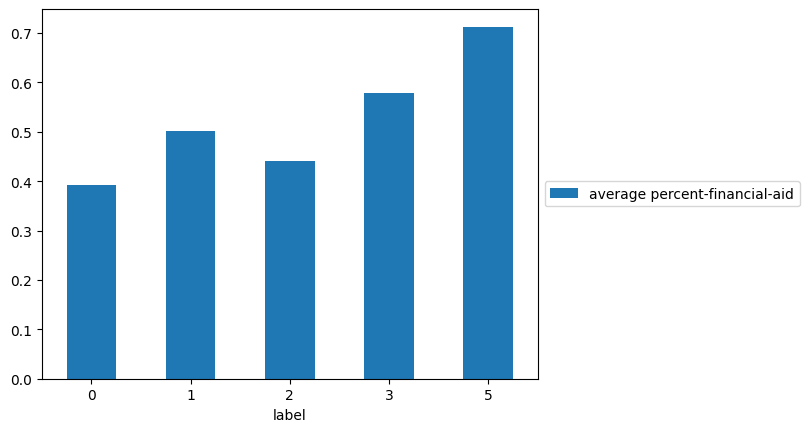

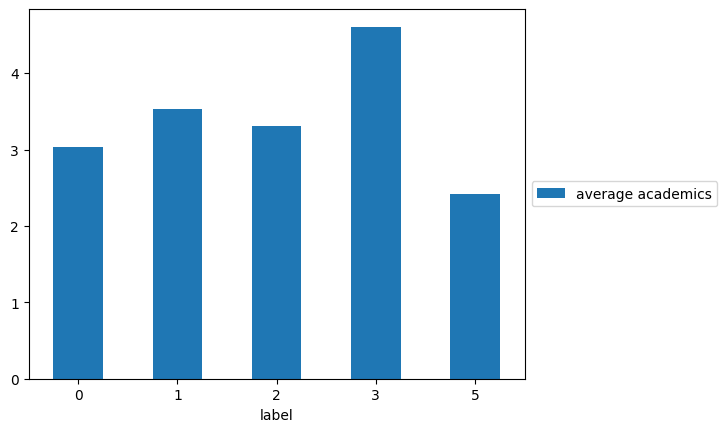

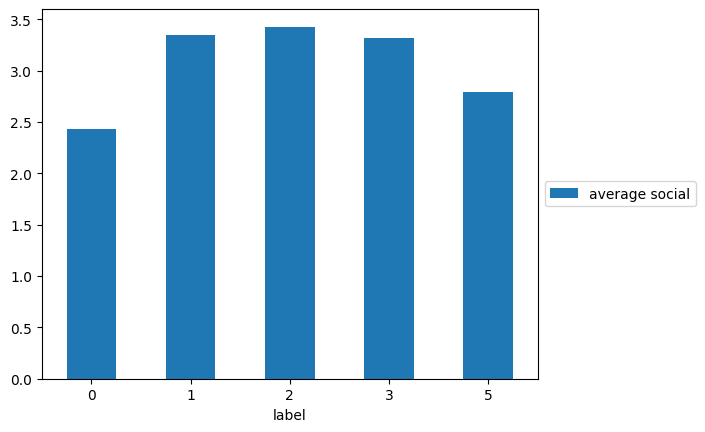

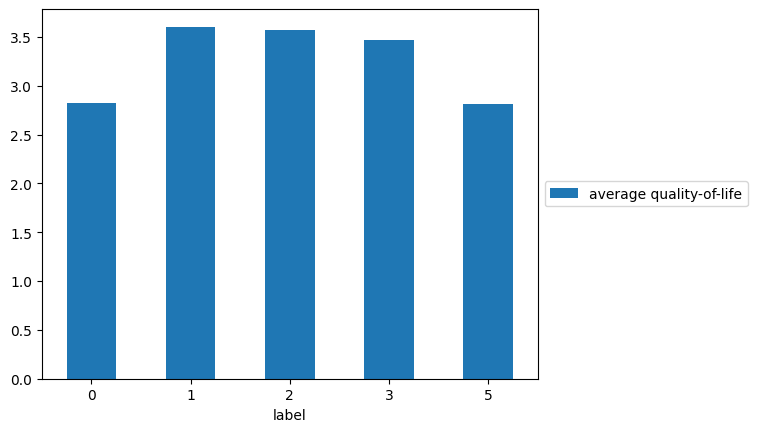

In [1495]:
shrunk_df = pd.crosstab(df['label'], df['percent-financial-aid'])
shrunk_df = weightedAverage(shrunk_df, 'percent-financial-aid')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['academics'])
shrunk_df = weightedAverage(shrunk_df, 'academics')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['social'])
shrunk_df = weightedAverage(shrunk_df, 'social')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

shrunk_df = pd.crosstab(df['label'], df['quality-of-life'])
shrunk_df = weightedAverage(shrunk_df, 'quality-of-life')
shrunk_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Although not quite as obvious as other clusters, one cluster seems to represent universities that have high finanical aid percentages and admittance rates but mediocre scores for academics, social life, and quality of life. The University of San Francisco is one notable university in this cluster.

The one remaining cluster seems difficult to characterize other than by saying it doesn't fit into any of the other categories. UC Davis is a notable example in this cluster.

## Main Analysis Part 2: Linear Regression

For this section, we will be using linear regression to predict three unknown variables using the data set. We will be predicting the quality of life of three different schools:
1. School 1 - a university with 8000 expenses.
2. School 2 - a university with an average combined SAT of 1050.
3. School 3 - a university with an average aid percent of 0.3.

Predicted Value for x = 8000:  3.37328673245614


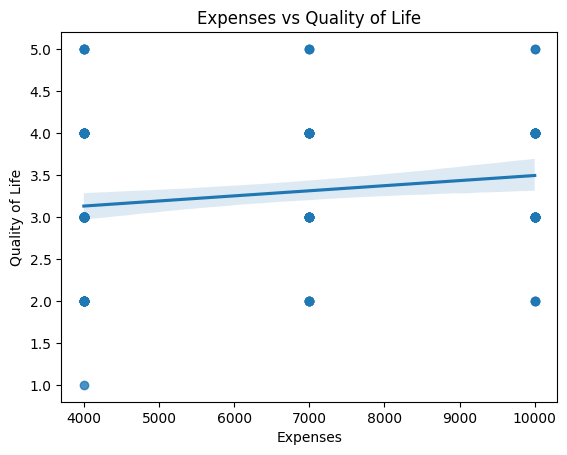

Predicted Value for x = 1050:  3.2232817387805626


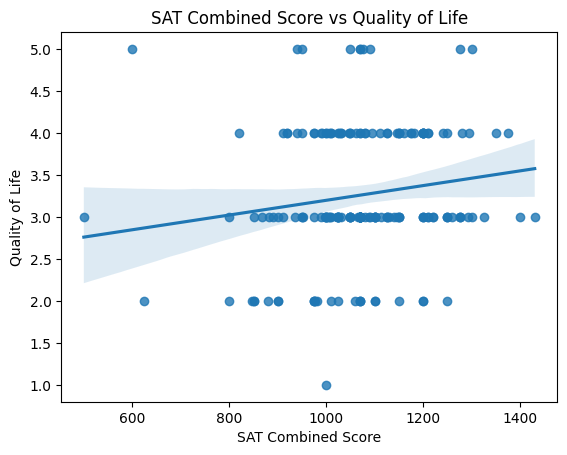

Predicted Value for x = 0.3:  3.30739445885493


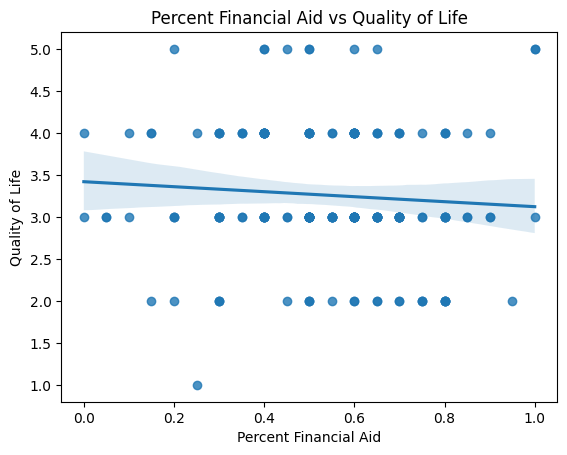

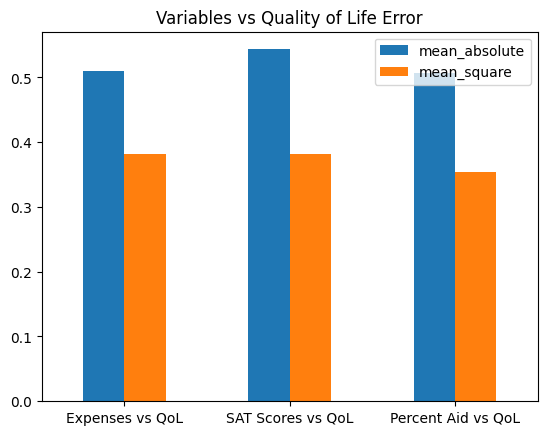

In [1496]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns


x = df[['expenses']]
y = df['quality-of-life']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions_1 = model.predict(X_test)
x_new = np.array([[8000]])
predicted_value_1 = model.predict(x_new)
print('Predicted Value for x = 8000: ', float(predicted_value_1))
mae_1 = metrics.mean_absolute_error(y_test, predictions_1)
mse_1 = metrics.mean_squared_error(y_test, predictions_1)
sns.regplot(x=x, y=y)
plt.xlabel('Expenses')
plt.ylabel('Quality of Life')
plt.title('Expenses vs Quality of Life')
plt.show()


x = df[['sat-combined']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions_2 = model.predict(X_test)
x_new = np.array([[1050]])
predicted_value_1 = model.predict(x_new)
print('Predicted Value for x = 1050: ', float(predicted_value_1))
mae_2 = metrics.mean_absolute_error(y_test, predictions_2)
mse_2 = metrics.mean_squared_error(y_test, predictions_2)
sns.regplot(x=x, y=y)
plt.xlabel('SAT Combined Score')
plt.ylabel('Quality of Life')
plt.title('SAT Combined Score vs Quality of Life')
plt.show()


x = df[['percent-financial-aid']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions_3 = model.predict(X_test)
x_new = np.array([[0.3]])
predicted_value_1 = model.predict(x_new)
print('Predicted Value for x = 0.3: ', float(predicted_value_1))
mae_3 = metrics.mean_absolute_error(y_test, predictions_3)
mse_3 = metrics.mean_squared_error(y_test, predictions_3)
sns.regplot(x=x, y=y)
plt.xlabel('Percent Financial Aid')
plt.ylabel('Quality of Life')
plt.title('Percent Financial Aid vs Quality of Life')
plt.show()


mean_abs = [mae_1, mae_2, mae_3]
mean_squ = [mse_1, mse_2, mse_3]
index = ['Expenses vs QoL', 'SAT Scores vs QoL', 'Percent Aid vs QoL']
df1 = pd.DataFrame({'mean_absolute': mean_abs, 'mean_square': mean_squ}, index=index)
ax = df1.plot.bar(rot=0)
plt.title('Variables vs Quality of Life Error')
plt.show()

## Main Analysis Part 3: Chi-Squared Test

For this section of our main analysis, we are going to be testing a few hypothesis we have about our data. Our null hypothesis are going to be the following:
1. University expenses do not have an impact on a student's quality of life.
2. Whether or not a school is private or state does not affect it's price.
3. A school's academics do not have an impact on its social life.
4. A school's percentage of males does not afect its quality of life.
5. The student-professor ratio does not affect a school's academics.

For all of the following tests, we will be using an alpha of 0.1 to determine if we accept or reject the null.

In [1497]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['expenses'], df['quality-of-life']))

print("Chi-Squared test statistic: ", chi2)
print("Degrees of freedom: ", dof)

Chi-Squared test statistic:  13.895588473673094
Degrees of freedom:  8


With 8 degrees of freedom and an alpha of 0.1, we need a chi squared value of 13.36 to reject the null. Since our chi squared value is 13.89, we reject the null. Therefore, a university's expenses has an impact on its quality of life.